<a href="https://colab.research.google.com/github/Itsmrk/Bahria-Uni/blob/master/04_classifying_images_of_colthing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U tensorflow_datasets

In [0]:
import tensorflow as tf 

In [0]:
#import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#helper libraries
import math 
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Import The Fashion MNIST dataset

In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'],dataset['test']

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

### **Explore the Data**

In [0]:
num_train_examples = metadata.splits['train'].num_examples
print("Number of training examples: {}".format(num_train_examples))
num_test_examples = metadata.splits['test'].num_examples
print("Number o Test examples: {}".format(num_test_examples))

### **Preprocess the data**

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /=255
  return images , labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

### **Explor The Processed Data**

In [0]:
# Take a single image, and remove the color dimension by reshaping
for image , label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

### **Build The Model**

#### **Setup the layers**

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### **Compile the model**

In [0]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### **Train the model**

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [0]:
model.fit(train_dataset, epochs=5 , steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

### **Evaluate Accuracy**

In [0]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps= math.ceil(num_test_examples/BATCH_SIZE))
print('Accuracy on test dataset: ', test_accuracy)

**Make Predictions and explore**

In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [115]:
predictions.shape

(32, 10)

In [116]:
predictions[0]

array([4.9996691e-12, 6.7673263e-08, 6.6597484e-02, 1.5643086e-11,
       6.3616648e-17, 6.0794659e-12, 9.3335390e-01, 2.0575786e-15,
       4.8518781e-05, 8.9851921e-16], dtype=float32)

In [117]:
np.argmax(predictions[0])

6

In [118]:
test_labels[0]

4

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  predictions_array = tf.nn.softmax(predictions_array)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
            color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  predictions_array = tf.nn.softmax(predictions_array)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

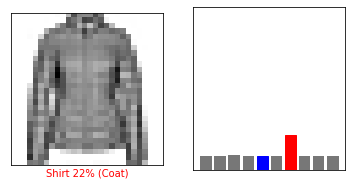

In [120]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

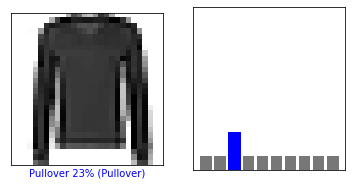

In [121]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

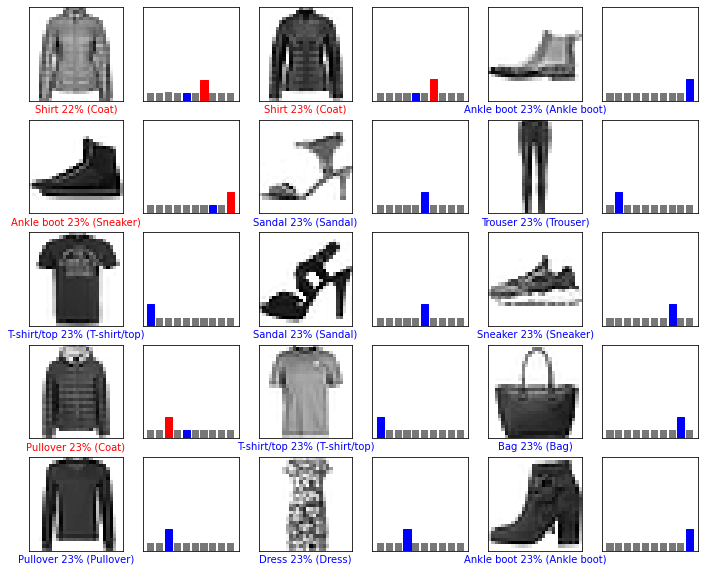

In [122]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [123]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [124]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [125]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.9996500e-12 6.7673270e-08 6.6597365e-02 1.5643117e-11 6.3616654e-17
  6.0794776e-12 9.3335402e-01 2.0575946e-15 4.8518832e-05 8.9851932e-16]]


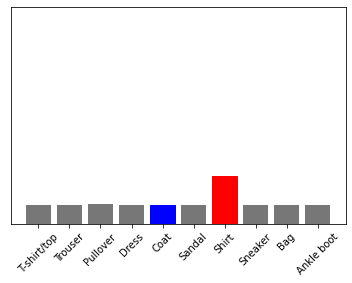

In [126]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [127]:
np.argmax(predictions_single[0])

6